# Image pyramids
Normally, we used to work with an image of constant size. But on some occasions, we need to work with (the same) images in different resolution. For example, while searching for something in an image, like face, we are not sure at what size the object will be present in said image. In that case, we will need to create a set of the same image with different resolutions and search for object in all of them. These set of images with different resolutions are called Image Pyramids (because when they are kept in a stack with the highest resolution image at the bottom and the lowest resolution image at top, it looks like a pyramid).

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [3]:
img_path = os.path.join('..', '..', 'pics', 'pic.jpg')
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [4]:
down1 = cv.pyrDown(img)
down2 = cv.pyrDown(down1)
up1 = cv.pyrUp(down2)
up2 = cv.pyrUp(up1)

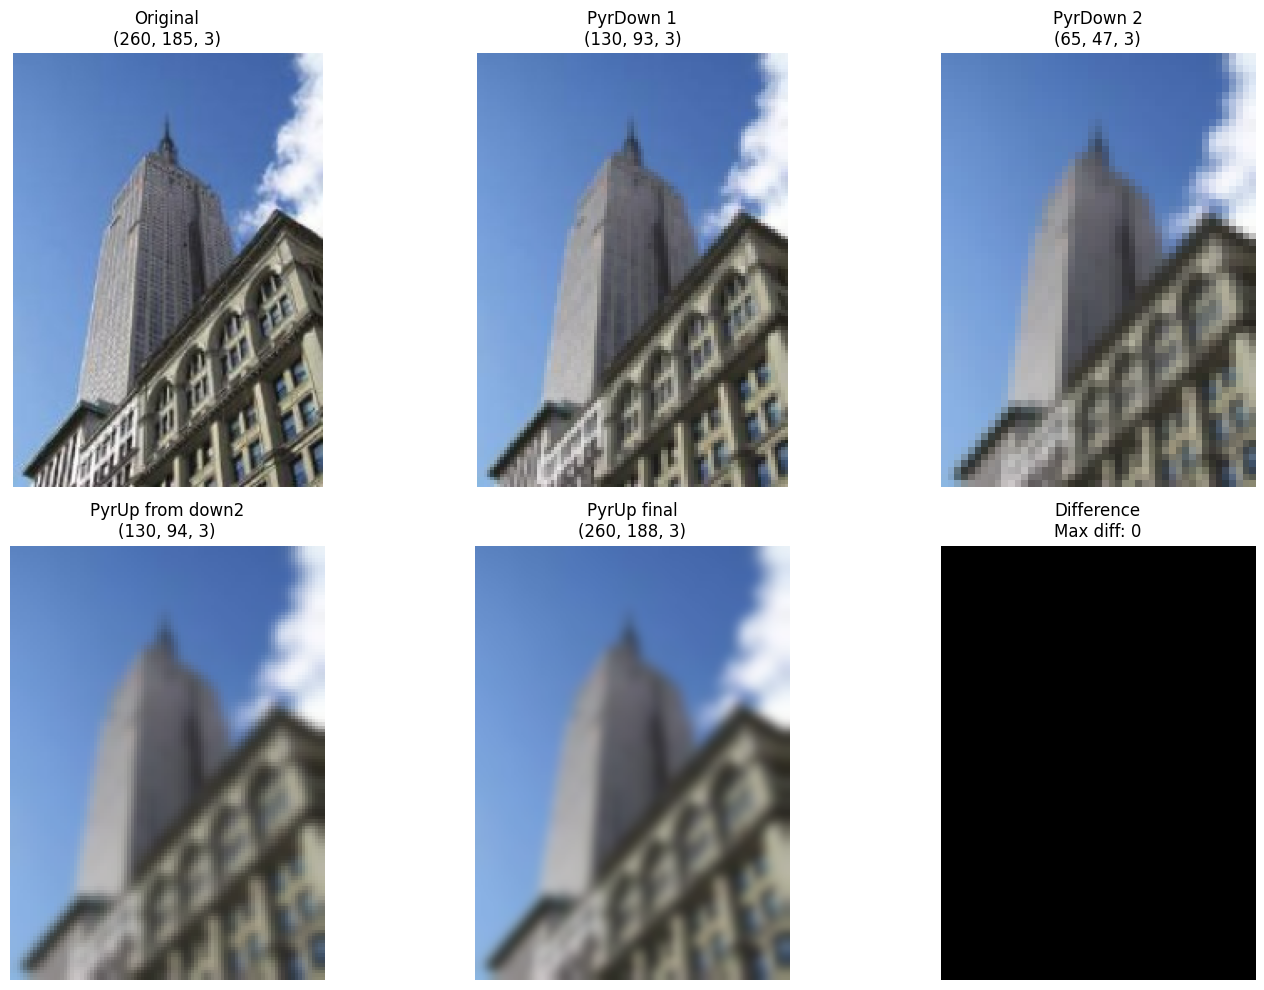

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

images = [
    (img, 'Original'),
    (down1, 'PyrDown 1'),
    (down2, 'PyrDown 2'), 
    (up1, 'PyrUp from down2'),
    (up2, 'PyrUp final')
]

for i, (img, title) in enumerate(images):
    row, col = i // 3, i % 3
    axes[row, col].imshow(img)
    axes[row, col].set_title(f'{title}\n{img.shape}')
    axes[row, col].axis('off')

# Разница между оригиналом и восстановленным
difference = cv.absdiff(img, up2)
axes[1, 2].imshow(difference)
axes[1, 2].set_title(f'Difference\nMax diff: {np.max(difference)}')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()